In [ ]:
import os

from google.colab import drive
drive.mount('/drive')

import numpy as np
import pandas as pd

import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Mounted at /drive


In [ ]:
from scipy.stats import beta, binom

In [ ]:
theta = np.linspace(0,1,num=100)

# Prior Distribution
prior_a, prior_b = 7, 3
prior_dist = beta.pdf(theta, prior_a, prior_b)

# Likelihood
n = 20
k = 16
likelihood = binom.pmf(k=k, n=n, p=theta)

# Posterior
post_a, post_b = 23, 7
post_dist = beta.pdf(theta, post_a, post_b)

In [ ]:
prior_dist.min(), prior_dist.max(), likelihood.min(), likelihood.max(), post_dist.min(), post_dist.max()

(0.0, 2.802782000145138, 0.0, 0.21814403034888002, 0.0, 5.248694678726124)

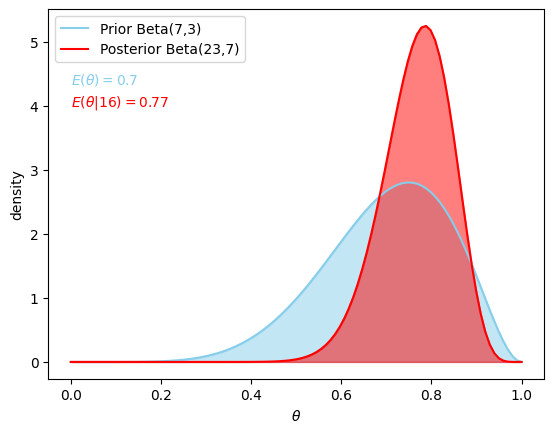

In [ ]:
plt.plot(theta, prior_dist, label='Prior Beta(7,3)', color='skyblue')
plt.fill_between(theta, 0, prior_dist, color='skyblue', alpha=.5)
plt.plot(theta, post_dist, label='Posterior Beta(23,7)', color='red')
plt.fill_between(theta, post_dist, color='red', alpha=.5)
plt.text(0, 4.35, f'$E(\\theta) = {round(prior_a/(prior_a+prior_b),2)}$', color='skyblue')
plt.text(0, 4, f'$E(\\theta|16) = {round(post_a/(post_a+post_b),2)}$', color='red')
plt.xlabel(f'$\\theta$')
plt.ylabel('density')
plt.legend(loc='best')

In [ ]:
1-beta.cdf(.9, 23,7)

0.021616715796312524

## Value of the Draft

In [ ]:
# def get_nba_draft_data(year_min, year_max):

#   df_draft = pd.DataFrame()

#   for year in range(year_min, year_max+1):
#     url = f"https://www.basketball-reference.com/draft/NBA_{year}.html"
#     df_year = pd.read_html(url)[0]

#     # Reset columns
#     df_year.columns = df_year.columns.droplevel(level=0)

#     # Remove rows without picks
#     df_year = df_year[~df_year['Pk'].isna()]

#     # Add draft year as column
#     df_year['draft_year'] = year

#     # Append to overall data
#     df_draft = pd.concat([df_draft, df_year], ignore_index=True)

#   # Remove players without WS/48
#   df_draft = df_draft[~df_draft['WS/48'].isna()]

#   return df_draft

In [ ]:
#df_draft = get_nba_draft_data(year_min=1990, year_max=2015)

In [ ]:
#df_draft.to_csv('../drive/MyDrive/data/Basketball/draft_1990_2015.csv', index=False)
df_draft = pd.read_csv('../drive/MyDrive/data/Basketball/draft_1990_2015.csv')

In [ ]:
df_draft.shape

(1310, 23)

In [ ]:
df_draft.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,draft_year
0,1,1,NJN,Derrick Coleman,Syracuse,15,781,25903,12884,7232,...,.769,33.2,16.5,9.3,2.5,64.3,.119,1.4,22.3,1990
1,2,2,SEA,Gary Payton,Oregon State,17,1335,47117,21813,5269,...,.729,35.3,16.3,3.9,6.7,145.5,.148,3.3,62.5,1990
2,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9,586,15628,8553,1087,...,.905,26.7,14.6,1.9,3.5,25.2,.077,-0.8,4.5,1990
3,4,4,ORL,Dennis Scott,Georgia Tech,10,629,17983,8094,1774,...,.793,28.6,12.9,2.8,2.1,33.4,.089,0.2,9.9,1990
4,5,5,CHH,Kendall Gill,Illinois,15,966,29481,12914,4002,...,.754,30.5,13.4,4.1,3.0,47.8,.078,0.1,15.8,1990


In [ ]:
# Add an index column
df_draft.reset_index(inplace=True)

In [ ]:
df_draft = df_draft[df_draft['Pk']!='Pk'] # remove column names for subsequent tables
df_draft['Pk'] = df_draft['Pk'].astype('int')
df_draft['WS'] = df_draft['WS'].astype('float')
df_draft['WS/48'] = df_draft['WS/48'].astype('float')
df_draft['BPM'] = df_draft['BPM'].astype('float')
df_draft['VORP'] = df_draft['VORP'].astype('float')

<ipython-input-14-179e23e11601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_draft['Pk'] = df_draft['Pk'].astype('int')
<ipython-input-14-179e23e11601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_draft['WS'] = df_draft['WS'].astype('float')
<ipython-input-14-179e23e11601>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
df_draft.head()

,index,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,draft_year
0,0,1,1,NJN,Derrick Coleman,Syracuse,15,781,25903,12884,...,.769,33.2,16.5,9.3,2.5,64.3,0.119,1.4,22.3,1990
1,1,2,2,SEA,Gary Payton,Oregon State,17,1335,47117,21813,...,.729,35.3,16.3,3.9,6.7,145.5,0.148,3.3,62.5,1990
2,2,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9,586,15628,8553,...,.905,26.7,14.6,1.9,3.5,25.2,0.077,-0.8,4.5,1990
3,3,4,4,ORL,Dennis Scott,Georgia Tech,10,629,17983,8094,...,.793,28.6,12.9,2.8,2.1,33.4,0.089,0.2,9.9,1990
4,4,5,5,CHH,Kendall Gill,Illinois,15,966,29481,12914,...,.754,30.5,13.4,4.1,3.0,47.8,0.078,0.1,15.8,1990


In [ ]:
df_draft.tail()

,index,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,draft_year
1305,1305,43,43,IND,Joe Young,Oregon,3,127,1077,429,...,.768,8.5,3.4,1.0,0.9,0.4,0.016,-4.1,-0.6,2015
1306,1306,44,44,PHO,Andrew Harrison,Kentucky,3,145,2987,1012,...,.779,20.6,7.0,2.0,2.8,3.2,0.051,-2.8,-0.6,2015
1307,1307,46,46,MIL,Norman Powell,UCLA,9,513,11809,6222,...,.830,23.0,12.1,2.6,1.5,25.1,0.102,-0.1,5.7,2015
1308,1308,48,48,OKC,Dakari Johnson,Kentucky,1,31,161,55,...,.550,5.2,1.8,1.1,0.3,0.6,0.178,-0.3,0.1,2015
1309,1309,56,56,NOP,Branden Dawson,Michigan State,1,6,29,5,...,1.000,4.8,0.8,0.7,0.0,0.0,0.069,-5.7,0.0,2015


In [ ]:
df_draft.isna().sum()

index           0
Rk              0
Pk              0
Tm              0
Player          0
College       194
Yrs             0
G               0
MP              0
PTS             0
TRB             0
AST             0
FG%             2
3P%           106
FT%            25
MP.1            0
PTS.1           0
TRB.1           0
AST.1           0
WS              0
WS/48           0
BPM             0
VORP            0
draft_year      0
dtype: int64

In [ ]:
df1 = df_draft.copy()
value_metrics = ['WS', 'WS/48', 'BPM', 'VORP']
df1 = df1[['Pk']+value_metrics]

df1.head()

,Pk,WS,WS/48,BPM,VORP
0,1,64.3,0.119,1.4,22.3
1,2,145.5,0.148,3.3,62.5
2,3,25.2,0.077,-0.8,4.5
3,4,33.4,0.089,0.2,9.9
4,5,47.8,0.078,0.1,15.8


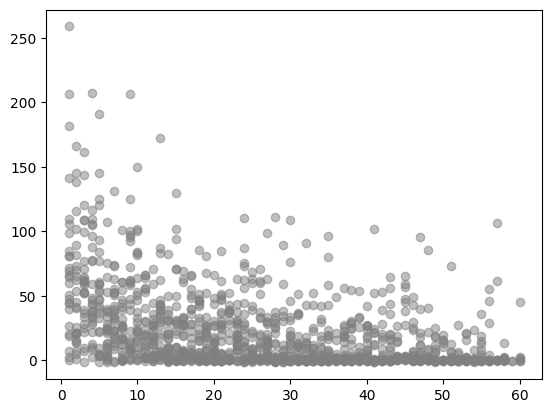

In [ ]:
plt.scatter(df1['Pk'], df1['WS'], color='gray', alpha=.5, label='Pick')


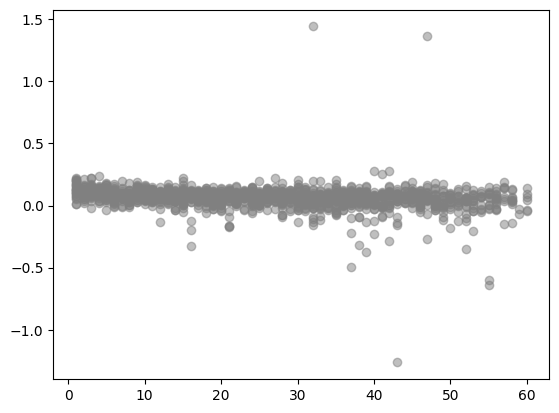

In [ ]:
plt.scatter(df1['Pk'], df1['WS/48'], color='gray', alpha=.5, label='Pick')

In [ ]:
df1['WS/48'].describe()

count    1284.000000
mean        0.063318
std         0.098876
min        -1.264000
25%         0.032000
50%         0.072000
75%         0.104000
max         1.442000
Name: WS/48, dtype: float64

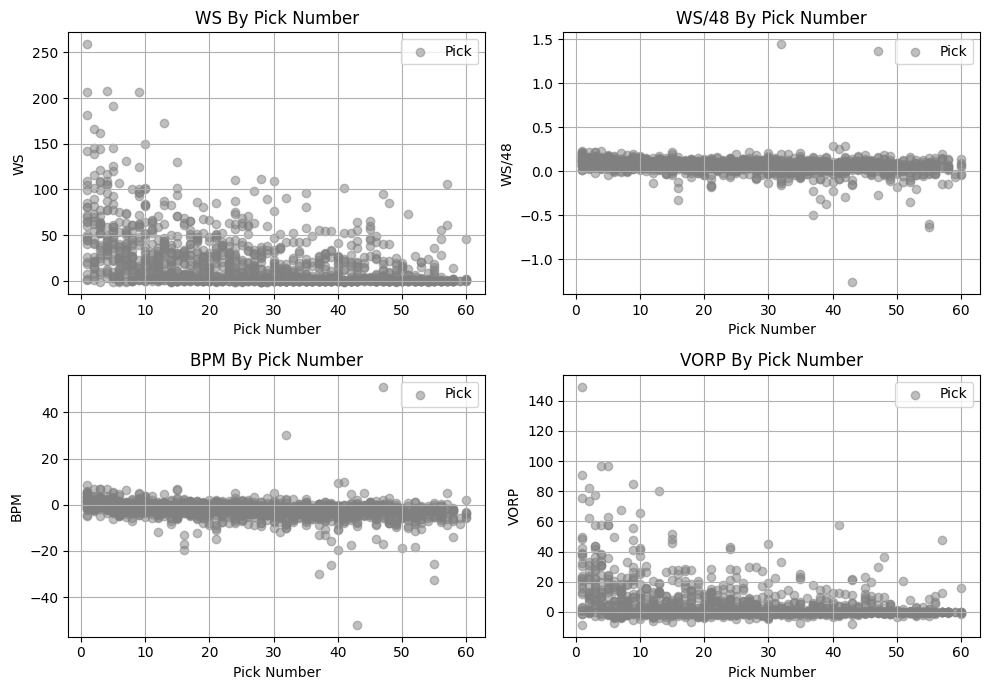

In [ ]:
# Plot 4 Metrics
plt.figure(figsize=(10,7))
for i, metric in enumerate(value_metrics):
  plt.subplot(2,2,i+1)
  plt.scatter(df1['Pk'], df1[metric], color='gray', alpha=.5, label='Pick')
  plt.xlabel('Pick Number')
  plt.ylabel(f'{metric}')
  plt.title(f"{metric} By Pick Number")
  plt.grid(True)
  plt.legend(loc='best')
  plt.tight_layout()

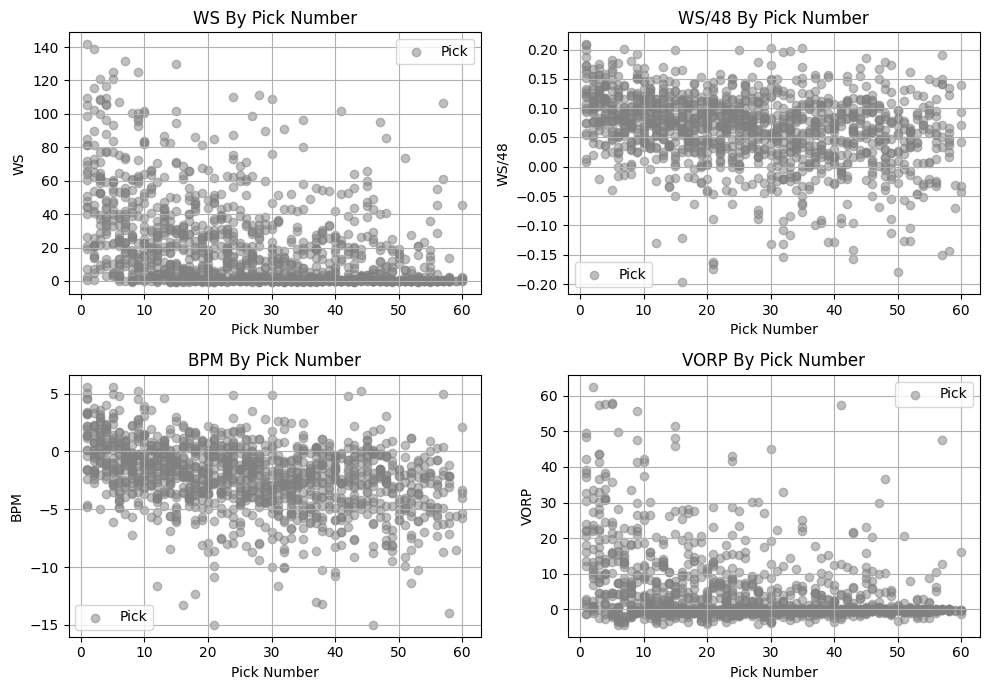

In [ ]:
# Plot 4 Metrics
plt.figure(figsize=(10,7))
for i, metric in enumerate(value_metrics):
  plt.subplot(2,2,i+1)
  metric_upper_cutoff = np.quantile(df1[metric], .99)
  metric_lower_cutoff = np.quantile(df1[metric], .01)
  df1_cut = df1[(df1[metric]<metric_upper_cutoff) & (df1[metric]>metric_lower_cutoff)]
  plt.scatter(df1_cut['Pk'], df1_cut[metric], color='gray', alpha=.5, label='Pick')
  plt.xlabel('Pick Number')
  plt.ylabel(f'{metric}')
  plt.title(f"{metric} By Pick Number")
  plt.grid(True)
  plt.legend(loc='best')
  plt.tight_layout()

## Develop simple models for estimating value based on draft pick
- Simple Average
- Exponential Decay (via OLS)
- Locally Weighted Scatterplot Smoother (LOWESS)



In [ ]:
def rmse(y_actual, y_pred):
  mse = ((y_actual-y_pred)**2).mean()
  return np.sqrt(mse)

In [ ]:
def avg_by_pick(df, value_metric):
  df_avg_by_pick = df.groupby('Pk')[value_metric].agg('mean') \
                     .reset_index() \
                     .rename(columns={value_metric:value_metric+'_Avg'})
  return df_avg_by_pick

In [ ]:
def exponential_decay(df, value_metric):
  # Create constant value to shift all data by so that all values > 0
  c = np.abs(df[value_metric].min())+.01
  df[value_metric+'_shift'] = df[value_metric]+c

  # Design Matrix
  X = sm.add_constant(df['Pk']) # adds intercept term to simple regression model

  # Fit Exponential Decay Model w/ OLS
  linreg = sm.OLS(endog=np.log(df[value_metric+'_shift']), exog=X).fit()

  # Back Transform: y_shift = exp(log(A)+Bx) = Aexp(Bx) ==> y = Aexp(Bx)-c
  pick = range(1,int(df['Pk'].max()+1))
  exp_decay = np.exp(linreg.params[0]+linreg.params[1]*pick)-c

  # Collect into dataframe
  df_exp_decay = pd.DataFrame(columns=['Pk', value_metric+'_exp_decay'])
  df_exp_decay['Pk'] = pick
  df_exp_decay[value_metric+'_exp_decay'] = exp_decay

  return df_exp_decay

In [ ]:
def lowess_reg(df, value_metric, lowess_frac):

  lowess_dict = {}

  # Iterate over fraction values
  for frac in lowess_frac:
    lowess = sm.nonparametric.lowess(df[value_metric], df['Pk'], frac=frac)
    df_lowess = pd.DataFrame(lowess).drop_duplicates()
    df_lowess.columns = ['Pk', f'{value_metric}_lowess_{frac}']
    lowess_dict[f'df_lowess_{frac}'] = df_lowess

  # Merge output from using different fractions together
  df_lowess = lowess_dict[f'df_lowess_{lowess_frac[0]}'].copy()
  if len(lowess_frac)>1:
    for i in range(1,len(lowess_dict)):
      df_lowess = df_lowess.merge(lowess_dict[f'df_lowess_{lowess_frac[i]}'],
                                  on='Pk', how='left')

  return df_lowess


In [ ]:
def draft_curves(df, value_metric, lowess_frac):

  df = df.copy()
  df = df[['Pk', 'Tm', 'Player',value_metric]]

  # Method 1 - Average by Pick
  df_avg_by_pick = avg_by_pick(df=df, value_metric=value_metric)
  df = df.merge(df_avg_by_pick, on='Pk', how='left')

  # Method 2 - Expoential Decay: y = Aexp(Bx) ==> log(y) = log(A)+Bx
  df_exp_decay = exponential_decay(df=df, value_metric=value_metric)
  df = df.merge(df_exp_decay, on='Pk', how='left')

  # Method 3 - Locally Weighted Scatterplot Smoothing (LOWESS)
  df_lowess = lowess_reg(df, value_metric, lowess_frac=lowess_frac)
  df = df.merge(df_lowess, on='Pk', how='left')

  # Compute RMSE
  lowess_cols = df_lowess.columns[1:].tolist()
  model_cols = [value_metric+'_Avg', value_metric+'_exp_decay']+lowess_cols
  print(f"lowess_cols: {lowess_cols}")
  print(f"model_cols: {model_cols}")
  for col in model_cols:
    print(f"RMSE of {col}: {round(rmse(y_actual=df[value_metric], y_pred=df[col]),4)}")



  return df



In [ ]:
df_ws = draft_curves(df=df_draft, lowess_frac=[.05,.1,.5], value_metric='WS')
df_ws48 = draft_curves(df=df_draft, lowess_frac=[.05,.1,.5], value_metric='WS/48')
df_bpm = draft_curves(df=df_draft, lowess_frac=[.05,.1,.5], value_metric='BPM')
df_vorp = draft_curves(df=df_draft, lowess_frac=[.05,.1,.5], value_metric='VORP')

lowess_cols: ['WS_lowess_0.05', 'WS_lowess_0.1', 'WS_lowess_0.5']
model_cols: ['WS_Avg', 'WS_exp_decay', 'WS_lowess_0.05', 'WS_lowess_0.1', 'WS_lowess_0.5']
RMSE of WS_Avg: 26.1237
RMSE of WS_exp_decay: 30.5374
RMSE of WS_lowess_0.05: 27.6164
RMSE of WS_lowess_0.1: 27.8687
RMSE of WS_lowess_0.5: 28.2245
lowess_cols: ['WS/48_lowess_0.05', 'WS/48_lowess_0.1', 'WS/48_lowess_0.5']
model_cols: ['WS/48_Avg', 'WS/48_exp_decay', 'WS/48_lowess_0.05', 'WS/48_lowess_0.1', 'WS/48_lowess_0.5']
RMSE of WS/48_Avg: 0.0943
RMSE of WS/48_exp_decay: 0.0971
RMSE of WS/48_lowess_0.05: 0.0968
RMSE of WS/48_lowess_0.1: 0.0967
RMSE of WS/48_lowess_0.5: 0.0969
lowess_cols: ['BPM_lowess_0.05', 'BPM_lowess_0.1', 'BPM_lowess_0.5']
model_cols: ['BPM_Avg', 'BPM_exp_decay', 'BPM_lowess_0.05', 'BPM_lowess_0.1', 'BPM_lowess_0.5']
RMSE of BPM_Avg: 3.9072
RMSE of BPM_exp_decay: 4.0578
RMSE of BPM_lowess_0.05: 3.9969
RMSE of BPM_lowess_0.1: 3.9962
RMSE of BPM_lowess_0.5: 4.0164
lowess_cols: ['VORP_lowess_0.05', 'VORP_low

In [ ]:
df_ws.shape


(1284, 10)

In [ ]:
df_ws.head()

,Pk,Tm,Player,WS,WS_Avg,WS_shift,WS_exp_decay,WS_lowess_0.05,WS_lowess_0.1,WS_lowess_0.5
0,1,NJN,Derrick Coleman,64.3,76.365385,65.91,26.498597,64.638383,60.144684,41.619028
1,2,SEA,Gary Payton,145.5,56.046154,147.11,25.299050,36.148775,53.737992,39.663140
2,3,DEN,Mahmoud Abdul-Rauf,25.2,62.353846,26.81,24.150695,52.286152,47.113660,37.735287
3,4,ORL,Dennis Scott,33.4,58.446154,35.01,23.051347,38.030250,41.248288,35.836149
4,5,CHH,Kendall Gill,47.8,55.380769,49.41,21.998913,43.184349,32.657244,33.963901


In [ ]:
def make_draft_curve_plots(df, value_metric):

  # Column Names
  lowess_cols = df.columns[-3:].tolist()
  model_cols = [value_metric+'_Avg', value_metric+'_exp_decay']+lowess_cols

  # Plot 1 - Original Plot
  xy = plt.figure(figsize=(10,7))
  plt.scatter(df['Pk'], df[value_metric], color='gray', alpha=.25, label='Pick')
  for col in model_cols:
    df1 = df[['Pk', col]].drop_duplicates().sort_values('Pk')
    plt.plot(df1['Pk'], df1[col], label=f'{col}')
  plt.legend(loc='best')
  plt.xlabel('Pick Number')
  plt.ylabel(value_metric)
  plt.title(f'{value_metric} by Pick Number for Drafts 1990-2015')
  plt.show()

  # Plot 2 - Cutoff Plot
  xy_cutoff = plt.figure(figsize=(10,7))
  metric_upper_cutoff = np.quantile(df[value_metric], .99)
  metric_lower_cutoff = np.quantile(df[value_metric], .01)
  df_cut = df[(df[value_metric]<metric_upper_cutoff) & (df[value_metric]>metric_lower_cutoff)]
  plt.scatter(df_cut['Pk'], df_cut[value_metric], color='gray', alpha=.25, label='Pick')
  for col in model_cols:
    df1 = df[['Pk',col]].drop_duplicates().sort_values('Pk')
    plt.plot(df1['Pk'], df1[col], label=f'{col}')
  plt.legend(loc='best')
  plt.xlabel('Pick Number')
  plt.ylabel(value_metric)
  plt.title(f"{value_metric} by Pick Number for Drafts 1990-2015 | Cutoff")
  plt.show()

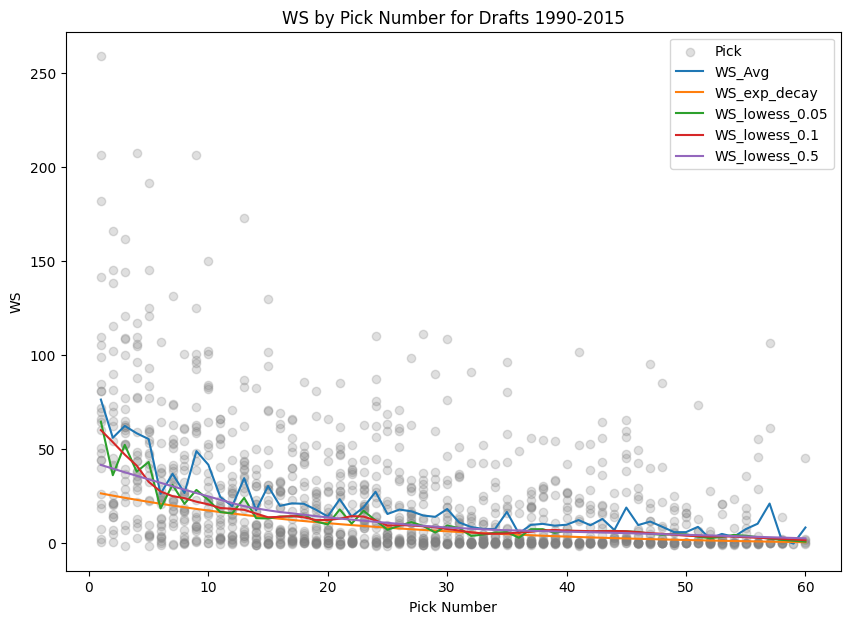

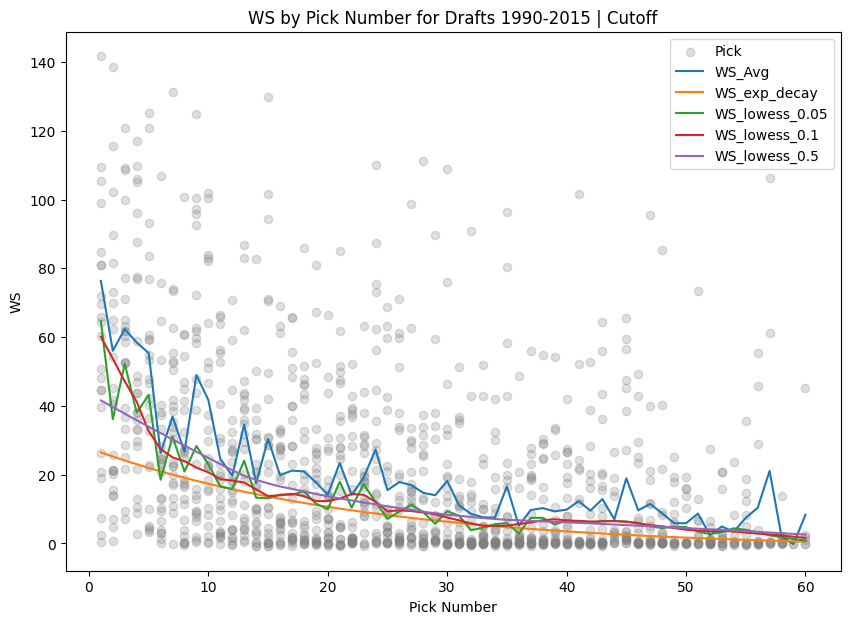

In [ ]:
make_draft_curve_plots(df=df_ws, value_metric='WS')

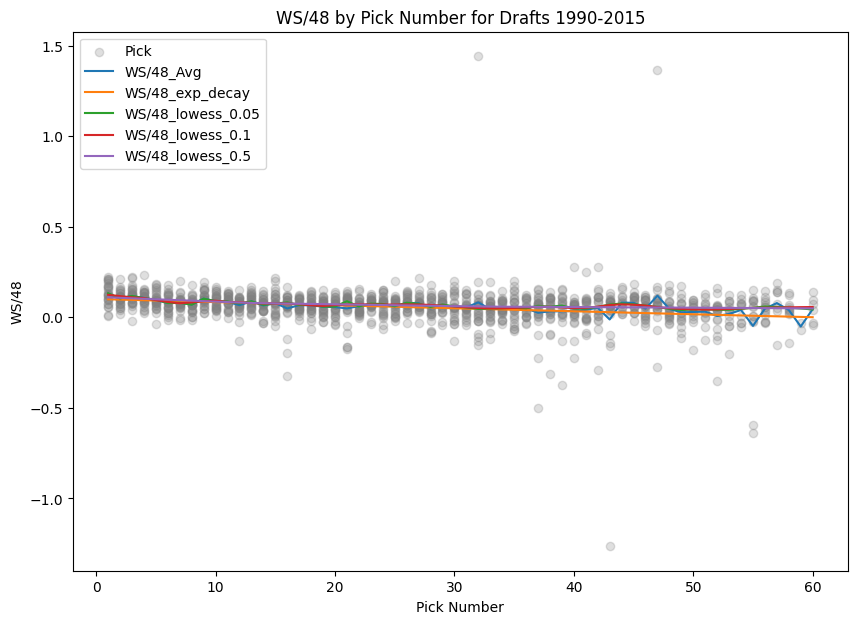

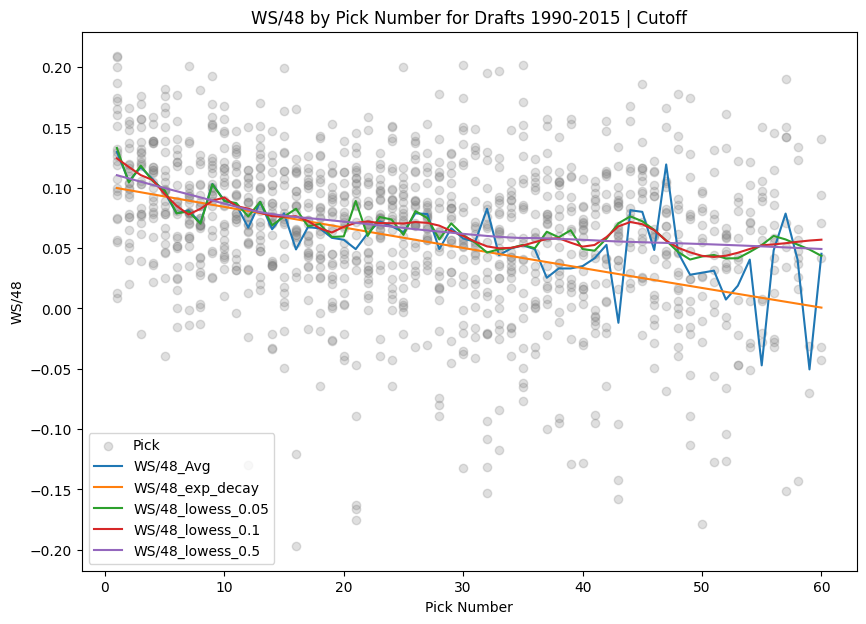

In [ ]:
make_draft_curve_plots(df=df_ws48, value_metric='WS/48')

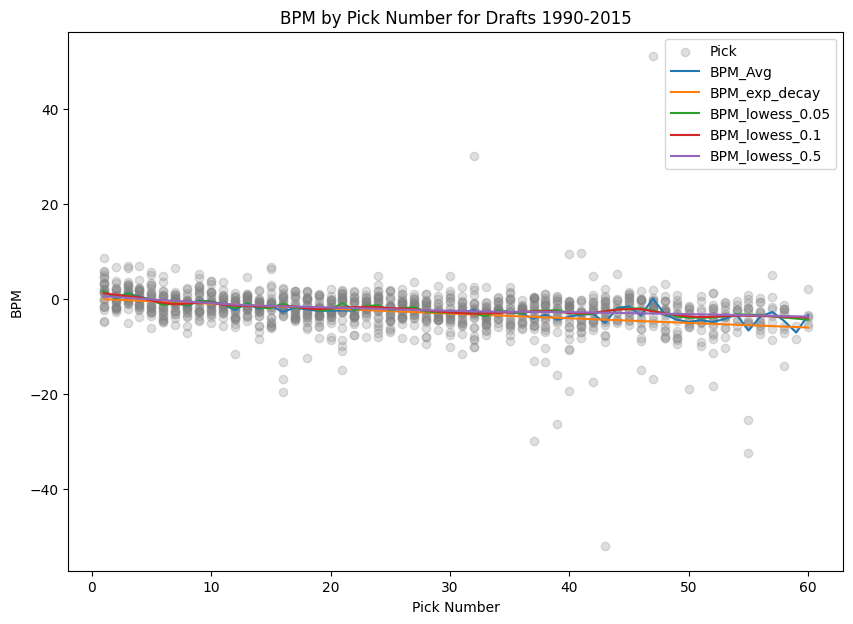

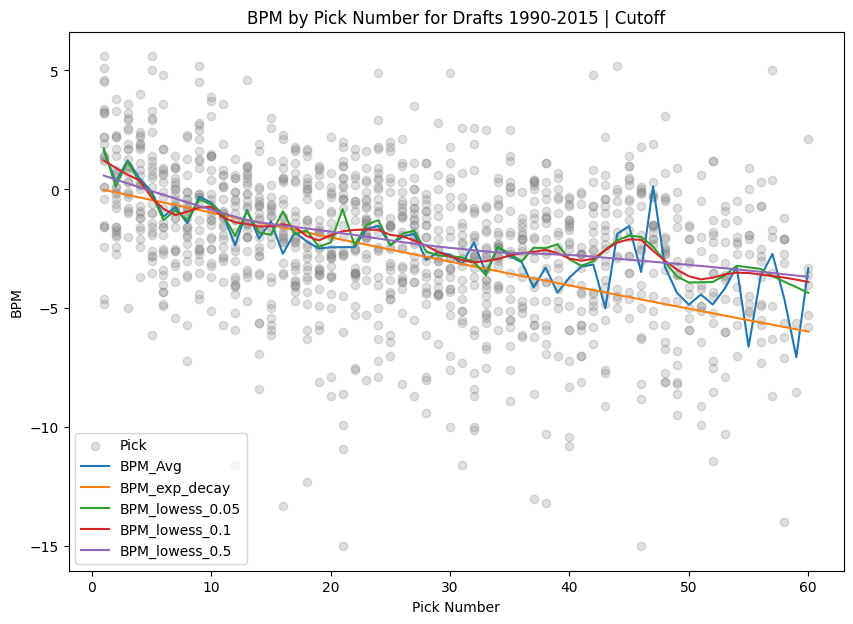

In [ ]:
make_draft_curve_plots(df=df_bpm, value_metric='BPM')

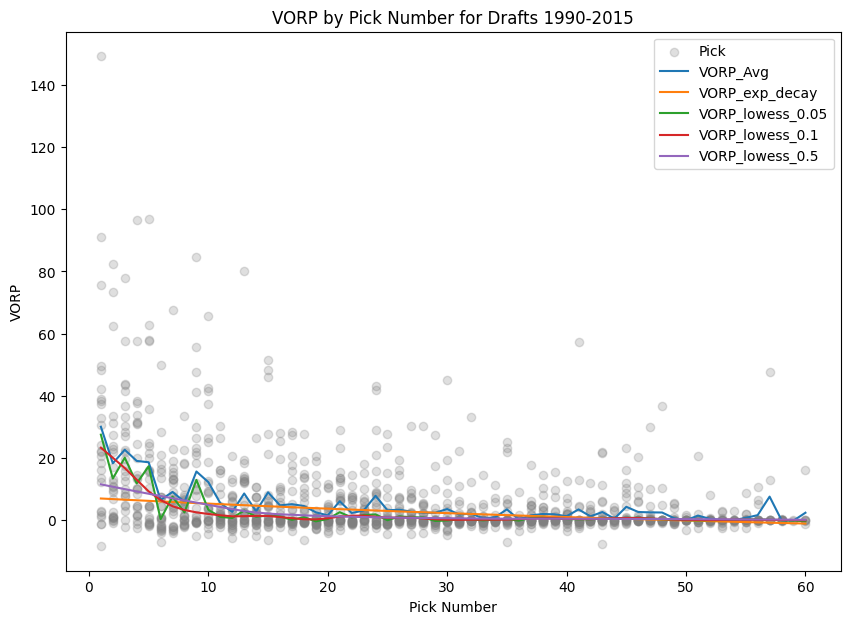

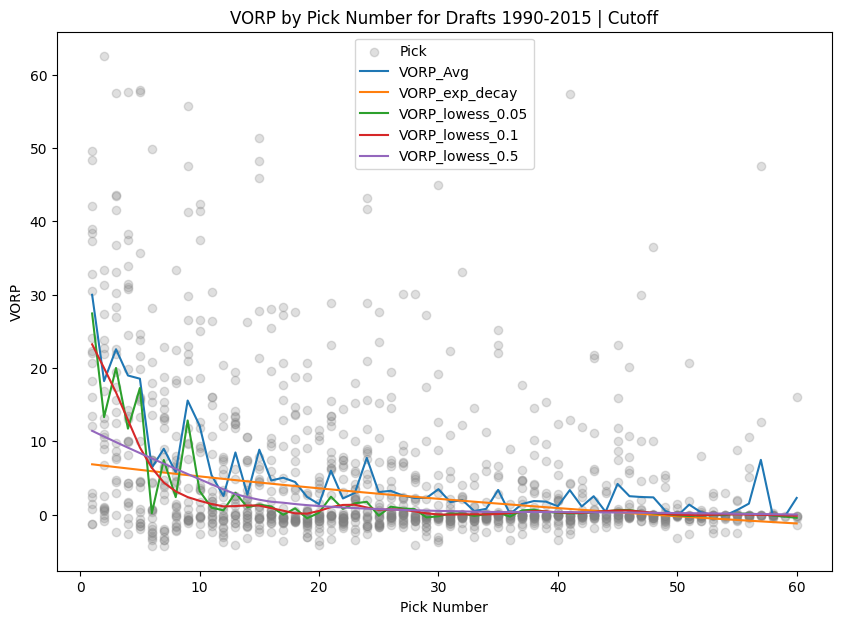

In [ ]:
make_draft_curve_plots(df=df_vorp, value_metric='VORP')

Let's use `WS_lowess_0.1`, `WS48_lowess_0.1`, `BPM_lowess_0.1`, `VORP_lowess_0.1`.

In [ ]:
# Compare predictions across each metric for each pick
df_compare = df_ws[['Pk','WS_lowess_0.1']].drop_duplicates()
df_compare = df_compare.merge(df_ws48[['Pk','WS/48_lowess_0.1']].drop_duplicates(), on='Pk', how='left')
df_compare = df_compare.merge(df_bpm[['Pk','BPM_lowess_0.1']].drop_duplicates(), on='Pk', how='left')
df_compare = df_compare.merge(df_vorp[['Pk','VORP_lowess_0.1']].drop_duplicates(), on='Pk', how='left')

In [ ]:
df_compare.shape

(60, 5)

In [ ]:
df_compare.head(10)

,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
0,1,60.144684,0.124380,1.215484,23.225729
1,2,53.737992,0.117230,0.910795,19.986079
2,3,47.113660,0.110495,0.615722,16.665749
3,4,41.248288,0.106421,0.381286,12.906363
4,5,32.657244,0.094784,-0.335236,9.158134
5,6,27.501127,0.085045,-0.818751,6.379846
6,7,25.024156,0.077841,-1.076067,4.381179
7,8,23.942832,0.082588,-0.935966,3.173045
8,9,22.066886,0.089252,-0.759002,2.398853
9,10,20.671011,0.091917,-0.727534,1.888819


In [ ]:
df_draft.head()

,index,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,draft_year
0,0,1,1,NJN,Derrick Coleman,Syracuse,15,781,25903,12884,...,.769,33.2,16.5,9.3,2.5,64.3,0.119,1.4,22.3,1990
1,1,2,2,SEA,Gary Payton,Oregon State,17,1335,47117,21813,...,.729,35.3,16.3,3.9,6.7,145.5,0.148,3.3,62.5,1990
2,2,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9,586,15628,8553,...,.905,26.7,14.6,1.9,3.5,25.2,0.077,-0.8,4.5,1990
3,3,4,4,ORL,Dennis Scott,Georgia Tech,10,629,17983,8094,...,.793,28.6,12.9,2.8,2.1,33.4,0.089,0.2,9.9,1990
4,4,5,5,CHH,Kendall Gill,Illinois,15,966,29481,12914,...,.754,30.5,13.4,4.1,3.0,47.8,0.078,0.1,15.8,1990


In [125]:
display(df_draft[['Player','BPM']].sort_values('BPM',ascending=False).head(5))
display(df_draft[['Player','VORP']].sort_values('VORP',ascending=False).head(5))
display(df_draft[['Player','WS']].sort_values('WS',ascending=False).head(5))
display(df_draft[['Player','WS/48']].sort_values('WS/48',ascending=False).head(5))

,Player,BPM
431,Tyson Wheeler,51.1
83,Chad Gallagher,30.1
1250,Nikola Jokić,9.7
424,Korleone Young,9.4
638,LeBron James,8.7


,Player,VORP
638,LeBron James,149.3
241,Kevin Garnett,96.9
736,Chris Paul,96.7
336,Tim Duncan,91.1
392,Dirk Nowitzki,84.8


,Player,WS
638,LeBron James,258.9
736,Chris Paul,207.4
336,Tim Duncan,206.4
392,Dirk Nowitzki,206.3
241,Kevin Garnett,191.4


,Player,WS/48
83,Chad Gallagher,1.442
431,Tyson Wheeler,1.367
424,Korleone Young,0.280
374,Jason Lawson,0.280
1250,Nikola Jokić,0.251


In [ ]:
df_draft.rename(columns={'MP.1': 'MPG', 'PTS.1':'PPG','TRB.1':'RPG','AST.1':'APG'}, inplace=True)
df_draft[['MP','PTS','AST','TRB']] = df_draft[['MP','PTS','AST','TRB']].astype('int64')
df_draft.head()

,index,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,FT%,MPG,PPG,RPG,APG,WS,WS/48,BPM,VORP,draft_year
0,0,1,1,NJN,Derrick Coleman,Syracuse,15,781,25903,12884,...,.769,33.2,16.5,9.3,2.5,64.3,0.119,1.4,22.3,1990
1,1,2,2,SEA,Gary Payton,Oregon State,17,1335,47117,21813,...,.729,35.3,16.3,3.9,6.7,145.5,0.148,3.3,62.5,1990
2,2,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9,586,15628,8553,...,.905,26.7,14.6,1.9,3.5,25.2,0.077,-0.8,4.5,1990
3,3,4,4,ORL,Dennis Scott,Georgia Tech,10,629,17983,8094,...,.793,28.6,12.9,2.8,2.1,33.4,0.089,0.2,9.9,1990
4,4,5,5,CHH,Kendall Gill,Illinois,15,966,29481,12914,...,.754,30.5,13.4,4.1,3.0,47.8,0.078,0.1,15.8,1990


In [ ]:
df_draft['MP'] = df_draft['MP'].astype('int')
df_draft['MPG'] = df_draft['MPG'].astype('float')

In [ ]:
df_draft[df_draft['Pk']==1]['MP'].describe()/48

count       0.541667
mean      524.038462
std       256.918745
min        39.687500
25%       391.651042
50%       494.437500
75%       622.723958
max      1149.020833
Name: MP, dtype: float64

Text(0.5, 0, 'Pick Number')

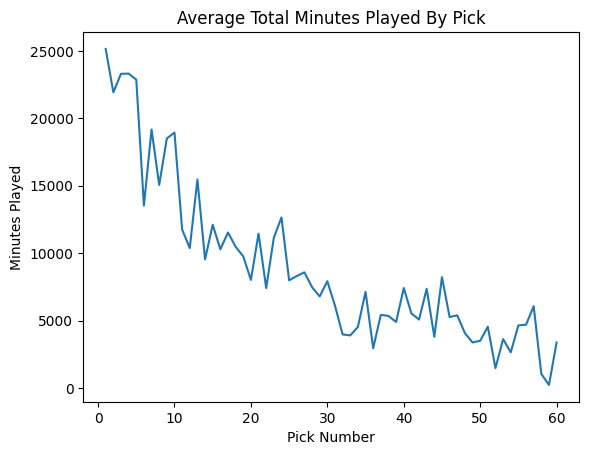

In [ ]:
df_draft['Pk'] = df_draft['Pk'].astype('int')
df_draft.groupby('Pk')['MP'].agg('mean').plot()
plt.title('Average Total Minutes Played By Pick')
plt.ylabel('Minutes Played')
plt.xlabel('Pick Number')

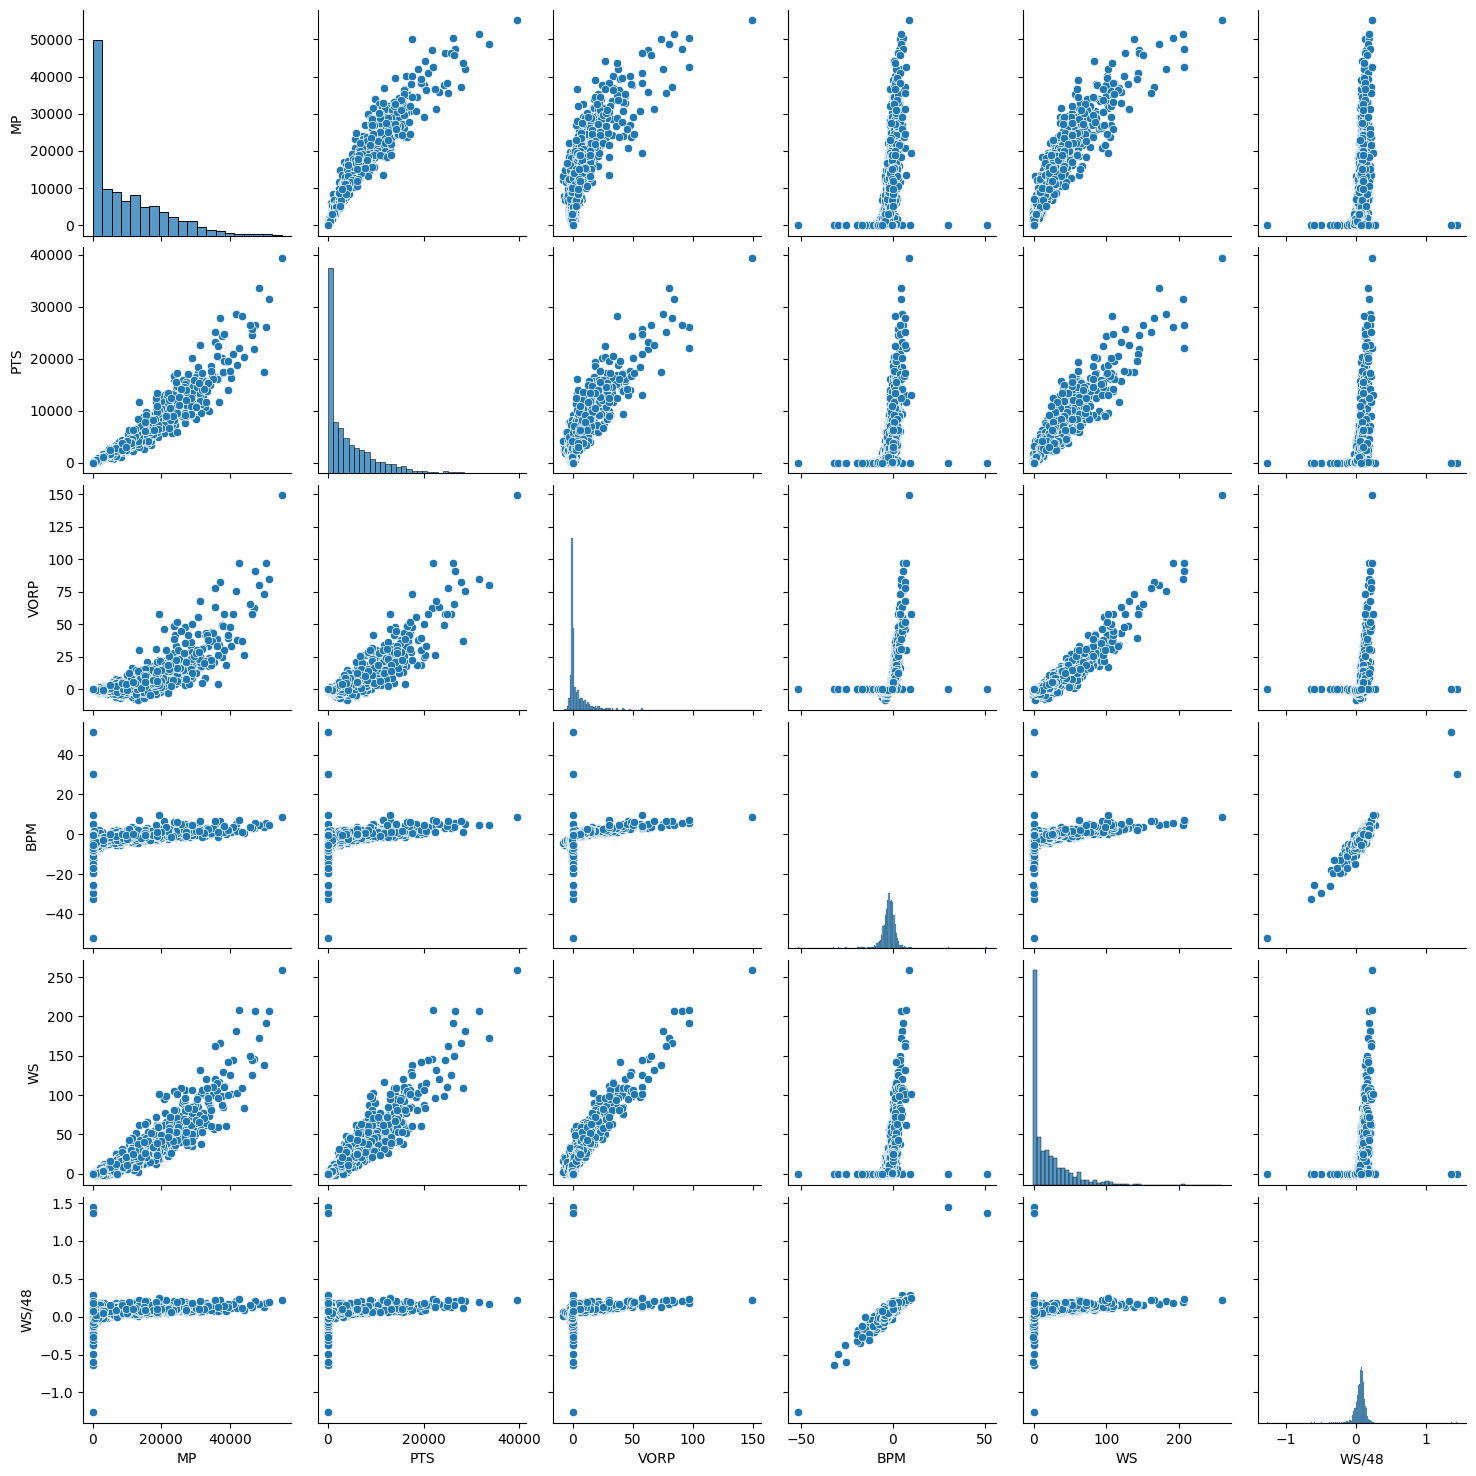

In [ ]:
sns.pairplot(df_draft[['MP','PTS','VORP','BPM','WS','WS/48']])

In [ ]:
df_compare

,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
0,1,60.144684,0.124380,1.215484,23.225729
1,2,53.737992,0.117230,0.910795,19.986079
2,3,47.113660,0.110495,0.615722,16.665749
3,4,41.248288,0.106421,0.381286,12.906363
4,5,32.657244,0.094784,-0.335236,9.158134
5,6,27.501127,0.085045,-0.818751,6.379846
6,7,25.024156,0.077841,-1.076067,4.381179
7,8,23.942832,0.082588,-0.935966,3.173045
8,9,22.066886,0.089252,-0.759002,2.398853
9,10,20.671011,0.091917,-0.727534,1.888819


## What is the dropoff in performance metric from picks 1 to the rest?


In [ ]:
df_dropoff_1_v_rest = (df_compare.iloc[:,1:]-df_compare.iloc[0,1:])/df_compare.iloc[0,1:]
df_dropoff_1_v_rest.insert(0, 'Pk',range(1,61))

In [ ]:
df_dropoff_1_v_rest.head()

,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
0,1,0.000000,0.000000,0.000000,0.000000
1,2,-0.106521,-0.057482,-0.250673,-0.139485
2,3,-0.216661,-0.111628,-0.493435,-0.282445
3,4,-0.314182,-0.144385,-0.686309,-0.444308
4,5,-0.457022,-0.237946,-1.275805,-0.605690


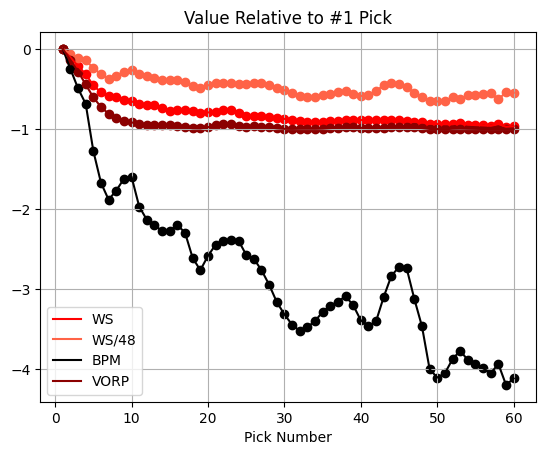

In [ ]:
plt.scatter(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS_lowess_0.1'], color='red')
plt.plot(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS_lowess_0.1'], label='WS', color='red')

plt.scatter(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS/48_lowess_0.1'], color='tomato')
plt.plot(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS/48_lowess_0.1'], label='WS/48', color='tomato')

plt.scatter(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['BPM_lowess_0.1'], color='black')
plt.plot(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['BPM_lowess_0.1'], label='BPM', color='black')

plt.scatter(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['VORP_lowess_0.1'], color='darkred')
plt.plot(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['VORP_lowess_0.1'], label='VORP', color='darkred')


plt.xlabel('Pick Number')
plt.title(f'Value Relative to #1 Pick')
plt.legend(loc='best')
plt.grid(True)

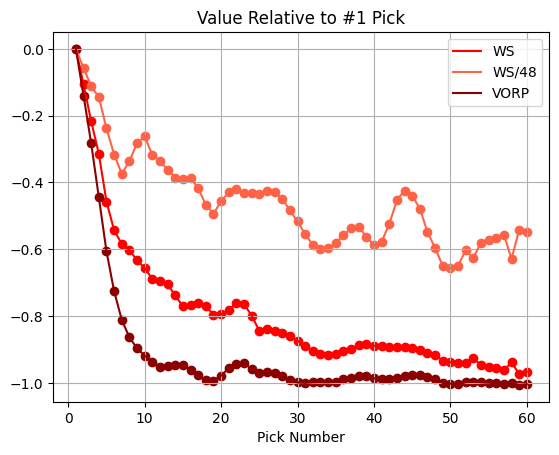

In [ ]:
plt.scatter(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS_lowess_0.1'], color='red')
plt.plot(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS_lowess_0.1'], label='WS', color='red')

plt.scatter(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS/48_lowess_0.1'], color='tomato')
plt.plot(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['WS/48_lowess_0.1'], label='WS/48', color='tomato')


plt.scatter(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['VORP_lowess_0.1'], color='darkred')
plt.plot(df_dropoff_1_v_rest['Pk'], df_dropoff_1_v_rest['VORP_lowess_0.1'], label='VORP', color='darkred')


plt.xlabel('Pick Number')
plt.title(f'Value Relative to #1 Pick')
plt.legend(loc='best')
plt.grid(True)

- BPM has a relatively huge dropoff after pick 4 and after pick 4, the differences become even more drastic...
- The other performance metrics are closer but there are some differences

## What is the dropoff in performance metric from picks 1-3 to the rest?

In [ ]:
df_compare.head()


,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
0,1,60.144684,0.124380,1.215484,23.225729
1,2,53.737992,0.117230,0.910795,19.986079
2,3,47.113660,0.110495,0.615722,16.665749
3,4,41.248288,0.106421,0.381286,12.906363
4,5,32.657244,0.094784,-0.335236,9.158134


In [ ]:
df_compare.head().shift(1)

,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
0,NaN,NaN,NaN,NaN,NaN
1,1.0,60.144684,0.124380,1.215484,23.225729
2,2.0,53.737992,0.117230,0.910795,19.986079
3,3.0,47.113660,0.110495,0.615722,16.665749
4,4.0,41.248288,0.106421,0.381286,12.906363


In [ ]:
def successive_dropoff(df, performance_metric, model):

  df = df[['Pk', performance_metric+'_'+model]].drop_duplicates().sort_values('Pk')
  print(df.iloc[48:,:])
  df2 = pd.DataFrame(columns=['Pk', 'successive_dropoff'])
  df2['Pk'] = range(1, 61)
  df2['successive_dropoff'] = 100*((df[performance_metric+'_'+model]-df[performance_metric+'_'+model].shift(1))/np.abs(df[performance_metric+'_'+model].shift(1)))
  print(df2.iloc[48:,:])
  #df2.loc[0,'successive_dropoff'] = 0

  return df2

In [ ]:
df_compare.head()

,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
0,1,60.144684,0.124380,1.215484,23.225729
1,2,53.737992,0.117230,0.910795,19.986079
2,3,47.113660,0.110495,0.615722,16.665749
3,4,41.248288,0.106421,0.381286,12.906363
4,5,32.657244,0.094784,-0.335236,9.158134


In [ ]:
df_next_dropoff = 100*(df_compare.iloc[:,1:]-df_compare.iloc[:,1:].shift(1))/np.abs(df_compare.iloc[:,1:].shift(1))
df_next_dropoff.insert(0,'Pk',range(1,61))
df_next_dropoff.head()

,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
0,1,NaN,NaN,NaN,NaN
1,2,-10.652133,-5.748216,-25.067321,-13.948537
2,3,-12.327092,-5.744771,-32.397306,-16.613216
3,4,-12.449409,-3.687347,-38.074901,-22.557560
4,5,-20.827637,-10.934953,-187.922425,-29.041712


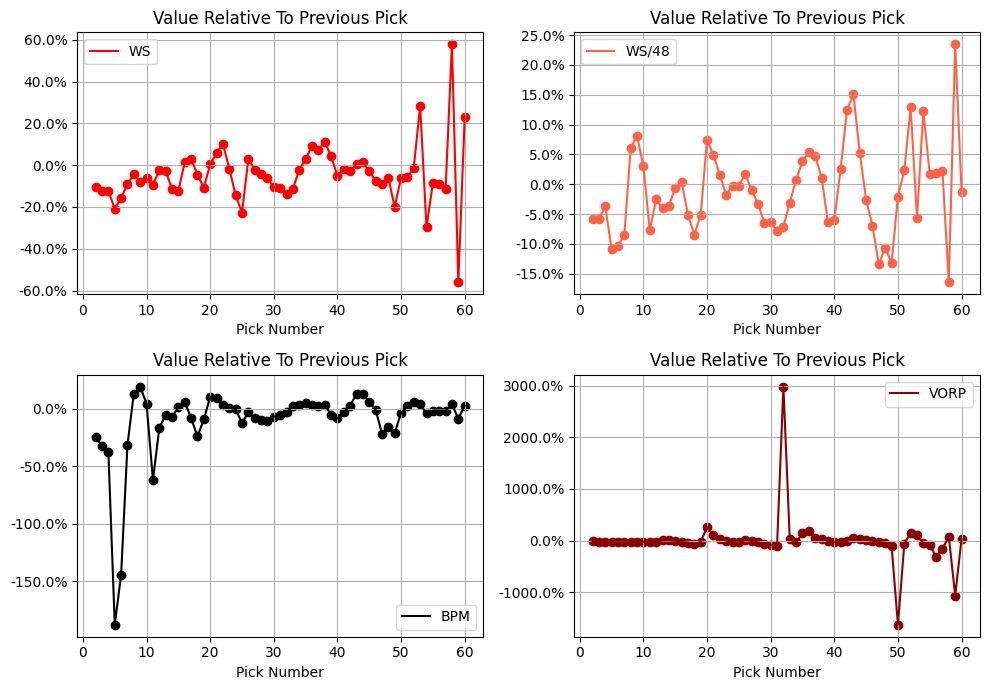

In [ ]:
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.scatter(df_next_dropoff['Pk'], df_next_dropoff['WS_lowess_0.1'], color='red')
plt.plot(df_next_dropoff['Pk'], df_next_dropoff['WS_lowess_0.1'], color='red', label='WS')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('Pick Number')
plt.title('Value Relative To Previous Pick')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x}%'))

plt.subplot(2,2,2)
plt.scatter(df_next_dropoff['Pk'], df_next_dropoff['WS/48_lowess_0.1'], color='tomato')
plt.plot(df_next_dropoff['Pk'], df_next_dropoff['WS/48_lowess_0.1'], color='tomato', label='WS/48')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('Pick Number')
plt.title('Value Relative To Previous Pick')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x}%'))

plt.subplot(2,2,3)
plt.scatter(df_next_dropoff['Pk'], df_next_dropoff['BPM_lowess_0.1'], color='black')
plt.plot(df_next_dropoff['Pk'], df_next_dropoff['BPM_lowess_0.1'], color='black', label='BPM')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('Pick Number')
plt.title('Value Relative To Previous Pick')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x}%'))

plt.subplot(2,2,4)
plt.scatter(df_next_dropoff['Pk'], df_next_dropoff['VORP_lowess_0.1'], color='darkred')
plt.plot(df_next_dropoff['Pk'], df_next_dropoff['VORP_lowess_0.1'], color='darkred', label='VORP')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('Pick Number')
plt.title('Value Relative To Previous Pick')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x}%'))

plt.tight_layout()

In [128]:

df_draft[df_draft['Pk'].isin([4,5])]

,index,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MPG,PPG,RPG,APG,WS,WS/48,BPM,VORP,draft_year
3,3,4,4,ORL,Dennis Scott,Georgia Tech,10,629,17983,8094,1774,1296,.417,.397,.793,28.6,12.9,2.8,2.1,33.4,0.089,0.2,9.9,1990
4,4,5,5,CHH,Kendall Gill,Illinois,15,966,29481,12914,4002,2945,.434,.300,.754,30.5,13.4,4.1,3.0,47.8,0.078,0.1,15.8,1990
56,56,4,4,DEN,Dikembe Mutombo,Georgetown,18,1196,36791,11729,12359,1240,.518,.000,.684,30.8,9.8,10.3,1.0,117.0,0.153,1.7,33.9,1991
57,57,5,5,MIA,Steve Smith,Michigan State,14,942,28855,13430,3060,2922,.440,.358,.845,30.6,14.3,3.2,3.1,83.7,0.139,1.4,24.6,1991
101,101,4,4,DAL,Jim Jackson,Ohio State,14,885,29067,12690,4152,2851,.428,.365,.825,32.8,14.3,4.7,3.2,35.8,0.059,-0.9,8.2,1992
102,102,5,5,DEN,LaPhonso Ellis,Notre Dame,11,624,17616,7410,4032,981,.452,.302,.730,28.2,11.9,6.5,1.6,32.8,0.089,-1.0,4.6,1992
150,150,4,4,DAL,Jamal Mashburn,Kentucky,11,611,22762,11644,3271,2414,.418,.345,.766,37.3,19.1,5.4,4.0,43.7,0.092,0.3,13.4,1993
151,151,5,5,MIN,Isaiah Rider,UNLV,9,563,17851,9405,2166,1535,.443,.352,.812,31.7,16.7,3.8,2.7,22.8,0.061,-1.0,4.5,1993
194,194,4,4,MIN,Donyell Marshall,UConn,15,957,25027,10716,6376,1305,.435,.350,.731,26.2,11.2,6.7,1.4,59.0,0.113,1.1,19.9,1994
195,195,5,5,WSB,Juwan Howard,Michigan,19,1208,36654,16159,7428,2663,.469,.120,.764,30.3,13.4,6.1,2.2,59.4,0.078,-1.6,3.8,1994


In [129]:
display(df_draft[df_draft['Pk']==4][['WS','WS/48','BPM','VORP']].describe())
display(df_draft[df_draft['Pk']==5][['WS','WS/48','BPM','VORP']].describe())

,WS,WS/48,BPM,VORP
count,26.000000,26.000000,26.000000,26.000000
mean,58.446154,0.107077,0.457692,18.973077
std,45.576715,0.044392,2.241994,22.103494
min,2.700000,0.022000,-3.700000,-2.600000
25%,30.700000,0.081000,-1.150000,4.000000
50%,43.800000,0.112500,0.250000,11.600000
75%,85.225000,0.137000,1.875000,31.000000
max,207.400000,0.234000,7.000000,96.700000


,WS,WS/48,BPM,VORP
count,26.000000,26.000000,26.000000,26.000000
mean,55.380769,0.096038,-0.088462,18.538462
std,48.100703,0.050169,2.760482,24.891301
min,-1.600000,-0.039000,-6.100000,-2.000000
25%,22.350000,0.069750,-1.875000,0.425000
50%,47.300000,0.097000,-0.250000,11.700000
75%,72.925000,0.126250,1.350000,23.250000
max,191.400000,0.182000,5.600000,96.900000


In [ ]:
df_compare[df_compare['Pk'].isin([30,31,32,33])]

,Pk,WS_lowess_0.1,WS/48_lowess_0.1,BPM_lowess_0.1,VORP_lowess_0.1
29,30,7.562757,0.060109,-2.818198,0.027707
30,31,6.718458,0.055363,-2.974250,0.001299
31,32,5.805753,0.051432,-3.068251,0.039987
32,33,5.152405,0.049835,-3.012795,0.049932


# Estimating Over/Under Performance Relative to Salary

## Read in data

In [ ]:
# Read in player salary data from bbref
df_sal = pd.read_html("https://www.basketball-reference.com/contracts/players.html")[0]

# Read in player value metrics (e.g., WS, VORP)
df_value = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2024_advanced.html")[0]

## Data Processing

### Salary Data

In [ ]:
# Reorganize salary data columns
cols = [df_sal.columns[i][1] for i in np.arange(df_sal.shape[1])]
df_sal.columns = cols

In [ ]:
# Remove missing values and rows with no numeric data
df_sal = df_sal[(~df_sal['Rk'].isna()) & (~df_sal['2023-24'].isna())]
df_sal = df_sal[df_sal['2023-24']!='2023-24']

# Convert salary amounts from strings to floats
df_sal['2023-24'] = df_sal['2023-24'].str.replace(',', '').str.replace('$', '').astype('float64')

In [ ]:
# Save data to csv if desired
#df_sal.to_csv('../drive/MyDrive/data/Basketball/player_salaries_2023_2024.csv', index=False)
#df_value.to_csv('../drive/MyDrive/data/Basketball/player_value_2023_2024.csv', index=False)

In [ ]:
df_sal.head()

,Rk,Player,Tm,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29,Guaranteed
0,1,Stephen Curry,GSW,51915615.0,"$55,761,216","$59,606,817",NaN,NaN,NaN,"$167,283,648"
1,2,Kevin Durant,PHO,47649433.0,"$51,179,021","$54,708,609",NaN,NaN,NaN,"$153,537,063"
2,3,Nikola Jokić,DEN,47607350.0,"$51,415,938","$55,224,526","$59,033,114","$62,841,702",NaN,"$213,280,928"
3,4,Joel Embiid,PHI,47607350.0,"$51,415,938","$55,224,526","$59,033,114",NaN,NaN,"$154,247,814"
4,5,LeBron James,LAL,47607350.0,"$51,415,938",NaN,NaN,NaN,NaN,"$47,607,350"


In [ ]:
df_value.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,.545,.207,...,NaN,1.2,2.2,3.4,.102,NaN,-1.7,0.3,-1.4,0.2
1,1,Precious Achiuwa,C,24,TOR,25,437,15.0,.512,.276,...,NaN,0.0,0.4,0.4,.048,NaN,-1.4,-0.2,-1.6,0.0
2,1,Precious Achiuwa,PF,24,NYK,49,1187,14.5,.564,.167,...,NaN,1.2,1.8,3.0,.122,NaN,-1.9,0.5,-1.4,0.2
3,2,Bam Adebayo,C,26,MIA,71,2416,19.8,.576,.041,...,NaN,2.9,4.3,7.2,.144,NaN,0.8,1.7,2.4,2.7
4,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,.497,.487,...,NaN,-0.5,0.6,0.1,.002,NaN,-3.5,-0.9,-4.4,-1.0


### Compute Cost Per Win

In [ ]:
total_nba_salary = df_sal['2023-24'].sum()
cost_per_win = total_nba_salary/1230
print(f"Total NBA Salary: {'${:,.2f}'.format(total_nba_salary)}")
print(f"Cost Per Win: {'${:,.2f}'.format(cost_per_win)}")

Total NBA Salary: $4,914,793,015.00
Cost Per Win: $3,995,766.68


## Player Value Data

In [ ]:
# Remove rows with no numeric data
df_value = df_value[df_value['WS']!='WS']

# Convert value metrics from string to floats
df_value['WS'] = df_value['WS'].astype('float64')
df_value['VORP'] = df_value['VORP'].astype('float64')

<ipython-input-65-4ffc08c5e86b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_value['WS'] = df_value['WS'].astype('float64')
<ipython-input-65-4ffc08c5e86b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_value['VORP'] = df_value['VORP'].astype('float64')


In [ ]:
# There are players with multiple rows (being on multiple teams during the season)
# Add up value for a given player
df_val_player = df_value.groupby('Player')[['WS','VORP']].agg('sum').reset_index()

In [ ]:
# Compute value based on win shares
df_val_player['WS_value'] = df_val_player['WS']*cost_per_win

In [ ]:
# Compute value based on VORP
df_val_player['WAR'] = df_val_player['VORP']*2.7
df_val_player['WAR_value'] = df_val_player['WAR']*cost_per_win

# Alternative method
cost_per_war = 5780000 # See slides
df_val_player['WAR_value_alt'] = df_val_player['WAR']*cost_per_war

In [ ]:
# Merge player salaries with player value
df_val_player = df_val_player.merge(df_sal[['Player','2023-24']], on='Player', how='left')

In [ ]:
df_val_player.head()

,Player,WS,VORP,WS_value,WAR,WAR_value,WAR_value_alt,2023-24
0,A.J. Green,1.1,0.0,4.395343e+06,0.00,0.000000e+00,0.0,1901769.0
1,A.J. Lawson,0.2,-0.2,7.991533e+05,-0.54,-2.157714e+06,-3121200.0,NaN
2,AJ Griffin,-0.4,-0.3,-1.598307e+06,-0.81,-3.236571e+06,-4681800.0,3712920.0
3,Aaron Gordon,7.1,1.9,2.836994e+07,5.13,2.049828e+07,29651400.0,22266182.0
4,Aaron Holiday,2.5,0.2,9.989417e+06,0.54,2.157714e+06,3121200.0,2019706.0


In [ ]:
# Remove players with missing salary data
df_val_player = df_val_player[~df_val_player['2023-24'].isna()]

In [ ]:
df_val_player.head()

,Player,WS,VORP,WS_value,WAR,WAR_value,WAR_value_alt,2023-24
0,A.J. Green,1.1,0.0,4.395343e+06,0.00,0.000000e+00,0.0,1901769.0
2,AJ Griffin,-0.4,-0.3,-1.598307e+06,-0.81,-3.236571e+06,-4681800.0,3712920.0
3,Aaron Gordon,7.1,1.9,2.836994e+07,5.13,2.049828e+07,29651400.0,22266182.0
4,Aaron Holiday,2.5,0.2,9.989417e+06,0.54,2.157714e+06,3121200.0,2019706.0
5,Aaron Nesmith,4.1,0.8,1.638264e+07,2.16,8.630856e+06,12484800.0,5634257.0


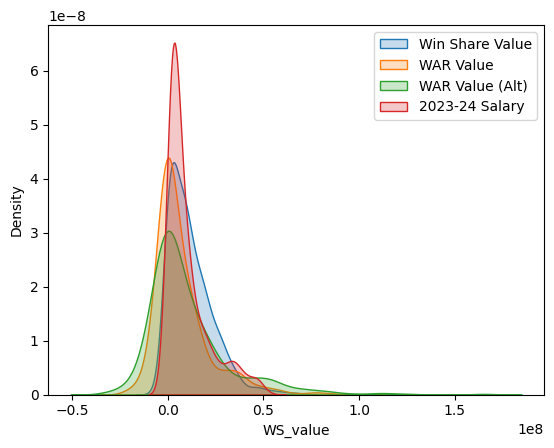

In [ ]:
import seaborn as sns
sns.kdeplot(data=df_val_player, x='WS_value', fill=True, label='Win Share Value')
sns.kdeplot(data=df_val_player, x='WAR_value', fill=True, label='WAR Value')
sns.kdeplot(data=df_val_player, x='WAR_value_alt', fill=True, label='WAR Value (Alt)')
sns.kdeplot(data=df_val_player, x='2023-24', fill=True, label='2023-24 Salary')
plt.legend(loc='best')

In [ ]:
# Compute relative value of player for each value method
df_val_player['WS_rel_val'] = df_val_player['WS_value']-df_val_player['2023-24']
df_val_player['WAR_rel_val'] = df_val_player['WAR_value']-df_val_player['2023-24']
df_val_player['WAR_alt_rel_val'] = df_val_player['WAR_value_alt']-df_val_player['2023-24']

# Create formatted relative value columns for easier reading
df_val_player['WS_rel_val_f'] = df_val_player['WS_rel_val'].apply(lambda x: '${:,.2f}'.format(x))
df_val_player['WS_val_f'] = df_val_player['WS_value'].apply(lambda x: '${:,.2f}'.format(x))
df_val_player['WAR_rel_val_f'] = df_val_player['WAR_rel_val'].apply(lambda x: '${:,.2f}'.format(x))
df_val_player['WAR_val_f'] = df_val_player['WAR_value'].apply(lambda x: '${:,.2f}'.format(x))
df_val_player['WAR_alt_rel_val_f'] = df_val_player['WAR_alt_rel_val'].apply(lambda x: '${:,.2f}'.format(x))
df_val_player['WAR_alt_val_f'] = df_val_player['WAR_value_alt'].apply(lambda x: '${:,.2f}'.format(x))

# Format salary column for easier reading
df_val_player['2023-24_f'] = df_val_player['2023-24'].apply(lambda x: '${:,.2f}'.format(x))

# Label over/under-performance (1: over, 0: under)
df_val_player['WS_over'] = np.where(df_val_player['WS_rel_val']>0,1,0)
df_val_player['WAR_over'] = np.where(df_val_player['WAR_rel_val']>0,1,0)
df_val_player['WAR_alt_over'] = np.where(df_val_player['WAR_alt_rel_val']>0,1,0)

## Inspecting player value results

### Win Shares

In [ ]:
df_ws_sort = df_val_player.sort_values('WS_rel_val', ascending=False)[['Player','WS','VORP','WAR','2023-24_f','WS_val_f','WS_rel_val_f','WAR_val_f','WAR_rel_val_f','WAR_alt_val_f','WAR_alt_rel_val_f']]
df_ws_sort.head(10)

,Player,WS,VORP,WAR,2023-24_f,WS_val_f,WS_rel_val_f,WAR_val_f,WAR_rel_val_f,WAR_alt_val_f,WAR_alt_rel_val_f
112,Daniel Gafford,15.5,4.3,11.61,"$12,402,000.00","$61,934,383.52","$49,532,383.52","$46,390,851.14","$33,988,851.14","$67,105,800.00","$54,703,800.00"
204,Immanuel Quickley,9.4,3.3,8.91,"$4,171,548.00","$37,560,206.78","$33,388,658.78","$35,602,281.11","$31,430,733.11","$51,499,800.00","$47,328,252.00"
567,Tyrese Haliburton,9.0,5.0,13.50,"$5,808,435.00","$35,961,900.11","$30,153,465.11","$53,942,850.16","$48,134,415.16","$78,030,000.00","$72,221,565.00"
568,Tyrese Maxey,8.1,3.4,9.18,"$4,343,920.00","$32,365,710.10","$28,021,790.10","$36,681,138.11","$32,337,218.11","$53,060,400.00","$48,716,480.00"
340,Kelly Olynyk,9.7,3.4,9.18,"$12,195,122.00","$38,758,936.78","$26,563,814.78","$36,681,138.11","$24,486,016.11","$53,060,400.00","$40,865,278.00"
80,Chet Holmgren,8.9,3.3,8.91,"$10,386,000.00","$35,562,323.44","$25,176,323.44","$35,602,281.11","$25,216,281.11","$51,499,800.00","$41,113,800.00"
514,Shai Gilgeous-Alexander,14.6,7.1,19.17,"$33,386,850.00","$58,338,193.51","$24,951,343.51","$76,598,847.23","$43,211,997.23","$110,802,600.00","$77,415,750.00"
249,Jalen Williams,7.3,2.4,6.48,"$4,558,680.00","$29,169,096.76","$24,610,416.76","$25,892,568.08","$21,333,888.08","$37,454,400.00","$32,895,720.00"
17,Alperen Sengun,6.9,3.5,9.45,"$3,536,280.00","$27,570,790.08","$24,034,510.08","$37,759,995.12","$34,223,715.12","$54,621,000.00","$51,084,720.00"
206,Isaiah Hartenstein,8.1,2.6,7.02,"$9,245,121.00","$32,365,710.10","$23,120,589.10","$28,050,282.09","$18,805,161.09","$40,575,600.00","$31,330,479.00"


In [ ]:
df_ws_sort.tail(10)

,Player,WS,VORP,WAR,2023-24_f,WS_val_f,WS_rel_val_f,WAR_val_f,WAR_rel_val_f,WAR_alt_val_f,WAR_alt_rel_val_f
301,Jordan Clarkson,0.2,-1.1,-2.97,"$23,487,629.00","$799,153.34","$-22,688,475.66","$-11,867,427.04","$-35,355,056.04","$-17,166,600.00","$-40,654,229.00"
523,Stephen Curry,7.2,4.4,11.88,"$51,915,615.00","$28,769,520.09","$-23,146,094.91","$47,469,708.14","$-4,445,906.86","$68,666,400.00","$16,750,785.00"
122,Darius Garland,2.7,0.5,1.35,"$34,005,250.00","$10,788,570.03","$-23,216,679.97","$5,394,285.02","$-28,610,964.98","$7,803,000.00","$-26,202,250.00"
368,Kyle Kuzma,0.2,0.5,1.35,"$25,568,182.00","$799,153.34","$-24,769,028.66","$5,394,285.02","$-20,173,896.98","$7,803,000.00","$-17,765,182.00"
360,Klay Thompson,3.6,0.9,2.43,"$43,219,440.00","$14,384,760.04","$-28,834,679.96","$9,709,713.03","$-33,509,726.97","$14,045,400.00","$-29,174,040.00"
309,Jordan Poole,-0.6,-1.2,-3.24,"$27,455,357.00","$-2,397,460.01","$-29,852,817.01","$-12,946,284.04","$-40,401,641.04","$-18,727,200.00","$-46,182,557.00"
220,Ja Morant,0.8,0.4,1.08,"$34,005,250.00","$3,196,613.34","$-30,808,636.66","$4,315,428.01","$-29,689,821.99","$6,242,400.00","$-27,762,850.00"
50,Bradley Beal,3.9,1.1,2.97,"$46,741,590.00","$15,583,490.05","$-31,158,099.95","$11,867,427.04","$-34,874,162.96","$17,166,600.00","$-29,574,990.00"
38,Ben Simmons,1.0,0.4,1.08,"$37,893,408.00","$3,995,766.68","$-33,897,641.32","$4,315,428.01","$-33,577,979.99","$6,242,400.00","$-31,651,008.00"
585,Zach LaVine,1.5,0.5,1.35,"$40,064,220.00","$5,993,650.02","$-34,070,569.98","$5,394,285.02","$-34,669,934.98","$7,803,000.00","$-32,261,220.00"


## Wins Above Replacement

In [ ]:
df_war_sort = df_val_player.sort_values('WAR_rel_val', ascending=False)[['Player','WS','VORP','WAR','2023-24_f','WS_val_f','WS_rel_val_f','WAR_val_f','WAR_rel_val_f','WAR_alt_val_f','WAR_alt_rel_val_f']]
df_war_sort.head(10)


,Player,WS,VORP,WAR,2023-24_f,WS_val_f,WS_rel_val_f,WAR_val_f,WAR_rel_val_f,WAR_alt_val_f,WAR_alt_rel_val_f
446,Nikola Jokić,17.0,10.6,28.62,"$47,607,350.00","$67,928,033.54","$20,320,683.54","$114,358,842.35","$66,751,492.35","$165,423,600.00","$117,816,250.00"
567,Tyrese Haliburton,9.0,5.0,13.50,"$5,808,435.00","$35,961,900.11","$30,153,465.11","$53,942,850.16","$48,134,415.16","$78,030,000.00","$72,221,565.00"
385,Luka Dončić,12.0,8.0,21.60,"$40,064,220.00","$47,949,200.15","$7,884,980.15","$86,308,560.26","$46,244,340.26","$124,848,000.00","$84,783,780.00"
514,Shai Gilgeous-Alexander,14.6,7.1,19.17,"$33,386,850.00","$58,338,193.51","$24,951,343.51","$76,598,847.23","$43,211,997.23","$110,802,600.00","$77,415,750.00"
153,Domantas Sabonis,12.6,6.2,16.74,"$30,600,000.00","$50,346,660.15","$19,746,660.15","$66,889,134.20","$36,289,134.20","$96,757,200.00","$66,157,200.00"
17,Alperen Sengun,6.9,3.5,9.45,"$3,536,280.00","$27,570,790.08","$24,034,510.08","$37,759,995.12","$34,223,715.12","$54,621,000.00","$51,084,720.00"
112,Daniel Gafford,15.5,4.3,11.61,"$12,402,000.00","$61,934,383.52","$49,532,383.52","$46,390,851.14","$33,988,851.14","$67,105,800.00","$54,703,800.00"
568,Tyrese Maxey,8.1,3.4,9.18,"$4,343,920.00","$32,365,710.10","$28,021,790.10","$36,681,138.11","$32,337,218.11","$53,060,400.00","$48,716,480.00"
188,Giannis Antetokounmpo,13.2,7.2,19.44,"$45,640,084.00","$52,744,120.16","$7,104,036.16","$77,677,704.24","$32,037,620.24","$112,363,200.00","$66,723,116.00"
238,Jalen Brunson,11.2,5.4,14.58,"$26,346,666.00","$44,752,586.80","$18,405,920.80","$58,258,278.18","$31,911,612.18","$84,272,400.00","$57,925,734.00"


In [ ]:
df_war_sort.tail(10)

,Player,WS,VORP,WAR,2023-24_f,WS_val_f,WS_rel_val_f,WAR_val_f,WAR_rel_val_f,WAR_alt_val_f,WAR_alt_rel_val_f
220,Ja Morant,0.8,0.4,1.08,"$34,005,250.00","$3,196,613.34","$-30,808,636.66","$4,315,428.01","$-29,689,821.99","$6,242,400.00","$-27,762,850.00"
151,Dillon Brooks,2.7,-0.9,-2.43,"$22,627,671.00","$10,788,570.03","$-11,839,100.97","$-9,709,713.03","$-32,337,384.03","$-14,045,400.00","$-36,673,071.00"
190,Gordon Hayward,3.0,-0.1,-0.27,"$31,500,000.00","$11,987,300.04","$-19,512,699.96","$-1,078,857.00","$-32,578,857.00","$-1,560,600.00","$-33,060,600.00"
360,Klay Thompson,3.6,0.9,2.43,"$43,219,440.00","$14,384,760.04","$-28,834,679.96","$9,709,713.03","$-33,509,726.97","$14,045,400.00","$-29,174,040.00"
38,Ben Simmons,1.0,0.4,1.08,"$37,893,408.00","$3,995,766.68","$-33,897,641.32","$4,315,428.01","$-33,577,979.99","$6,242,400.00","$-31,651,008.00"
585,Zach LaVine,1.5,0.5,1.35,"$40,064,220.00","$5,993,650.02","$-34,070,569.98","$5,394,285.02","$-34,669,934.98","$7,803,000.00","$-32,261,220.00"
50,Bradley Beal,3.9,1.1,2.97,"$46,741,590.00","$15,583,490.05","$-31,158,099.95","$11,867,427.04","$-34,874,162.96","$17,166,600.00","$-29,574,990.00"
60,Bruce Brown,4.4,-1.2,-3.24,"$22,000,000.00","$17,581,373.39","$-4,418,626.61","$-12,946,284.04","$-34,946,284.04","$-18,727,200.00","$-40,727,200.00"
301,Jordan Clarkson,0.2,-1.1,-2.97,"$23,487,629.00","$799,153.34","$-22,688,475.66","$-11,867,427.04","$-35,355,056.04","$-17,166,600.00","$-40,654,229.00"
309,Jordan Poole,-0.6,-1.2,-3.24,"$27,455,357.00","$-2,397,460.01","$-29,852,817.01","$-12,946,284.04","$-40,401,641.04","$-18,727,200.00","$-46,182,557.00"


### Wins Above Replacement (Alternative)

In [ ]:
df_war_alt_sort = df_val_player.sort_values('WAR_alt_rel_val', ascending=False)[['Player','WS','VORP','WAR','2023-24_f','WS_val_f','WS_rel_val_f','WAR_val_f','WAR_rel_val_f','WAR_alt_val_f','WAR_alt_rel_val_f']]
df_war_alt_sort.head(10)

,Player,WS,VORP,WAR,2023-24_f,WS_val_f,WS_rel_val_f,WAR_val_f,WAR_rel_val_f,WAR_alt_val_f,WAR_alt_rel_val_f
446,Nikola Jokić,17.0,10.6,28.62,"$47,607,350.00","$67,928,033.54","$20,320,683.54","$114,358,842.35","$66,751,492.35","$165,423,600.00","$117,816,250.00"
385,Luka Dončić,12.0,8.0,21.60,"$40,064,220.00","$47,949,200.15","$7,884,980.15","$86,308,560.26","$46,244,340.26","$124,848,000.00","$84,783,780.00"
514,Shai Gilgeous-Alexander,14.6,7.1,19.17,"$33,386,850.00","$58,338,193.51","$24,951,343.51","$76,598,847.23","$43,211,997.23","$110,802,600.00","$77,415,750.00"
567,Tyrese Haliburton,9.0,5.0,13.50,"$5,808,435.00","$35,961,900.11","$30,153,465.11","$53,942,850.16","$48,134,415.16","$78,030,000.00","$72,221,565.00"
188,Giannis Antetokounmpo,13.2,7.2,19.44,"$45,640,084.00","$52,744,120.16","$7,104,036.16","$77,677,704.24","$32,037,620.24","$112,363,200.00","$66,723,116.00"
153,Domantas Sabonis,12.6,6.2,16.74,"$30,600,000.00","$50,346,660.15","$19,746,660.15","$66,889,134.20","$36,289,134.20","$96,757,200.00","$66,157,200.00"
238,Jalen Brunson,11.2,5.4,14.58,"$26,346,666.00","$44,752,586.80","$18,405,920.80","$58,258,278.18","$31,911,612.18","$84,272,400.00","$57,925,734.00"
112,Daniel Gafford,15.5,4.3,11.61,"$12,402,000.00","$61,934,383.52","$49,532,383.52","$46,390,851.14","$33,988,851.14","$67,105,800.00","$54,703,800.00"
17,Alperen Sengun,6.9,3.5,9.45,"$3,536,280.00","$27,570,790.08","$24,034,510.08","$37,759,995.12","$34,223,715.12","$54,621,000.00","$51,084,720.00"
568,Tyrese Maxey,8.1,3.4,9.18,"$4,343,920.00","$32,365,710.10","$28,021,790.10","$36,681,138.11","$32,337,218.11","$53,060,400.00","$48,716,480.00"


In [ ]:
df_war_alt_sort.tail(10)

,Player,WS,VORP,WAR,2023-24_f,WS_val_f,WS_rel_val_f,WAR_val_f,WAR_rel_val_f,WAR_alt_val_f,WAR_alt_rel_val_f
585,Zach LaVine,1.5,0.5,1.35,"$40,064,220.00","$5,993,650.02","$-34,070,569.98","$5,394,285.02","$-34,669,934.98","$7,803,000.00","$-32,261,220.00"
47,Bojan Bogdanović,2.1,-0.8,-2.16,"$20,000,000.00","$8,391,110.03","$-11,608,889.97","$-8,630,856.03","$-28,630,856.03","$-12,484,800.00","$-32,484,800.00"
572,Vasilije Micić,0.8,-1.6,-4.32,"$7,723,000.00","$3,196,613.34","$-4,526,386.66","$-17,261,712.05","$-24,984,712.05","$-24,969,600.00","$-32,692,600.00"
190,Gordon Hayward,3.0,-0.1,-0.27,"$31,500,000.00","$11,987,300.04","$-19,512,699.96","$-1,078,857.00","$-32,578,857.00","$-1,560,600.00","$-33,060,600.00"
453,Ochai Agbaji,0.2,-2.0,-5.40,"$4,114,200.00","$799,153.34","$-3,315,046.66","$-21,577,140.07","$-25,691,340.07","$-31,212,000.00","$-35,326,200.00"
508,Scoot Henderson,-1.7,-1.7,-4.59,"$9,770,880.00","$-6,792,803.35","$-16,563,683.35","$-18,340,569.06","$-28,111,449.06","$-26,530,200.00","$-36,301,080.00"
151,Dillon Brooks,2.7,-0.9,-2.43,"$22,627,671.00","$10,788,570.03","$-11,839,100.97","$-9,709,713.03","$-32,337,384.03","$-14,045,400.00","$-36,673,071.00"
301,Jordan Clarkson,0.2,-1.1,-2.97,"$23,487,629.00","$799,153.34","$-22,688,475.66","$-11,867,427.04","$-35,355,056.04","$-17,166,600.00","$-40,654,229.00"
60,Bruce Brown,4.4,-1.2,-3.24,"$22,000,000.00","$17,581,373.39","$-4,418,626.61","$-12,946,284.04","$-34,946,284.04","$-18,727,200.00","$-40,727,200.00"
309,Jordan Poole,-0.6,-1.2,-3.24,"$27,455,357.00","$-2,397,460.01","$-29,852,817.01","$-12,946,284.04","$-40,401,641.04","$-18,727,200.00","$-46,182,557.00"


In [ ]:
df_val_player[df_val_player['Player'].str.contains('LeBron')]

,Player,WS,VORP,WS_value,WAR,WAR_value,WAR_value_alt,2023-24,WS_rel_val,WAR_rel_val,WAR_alt_rel_val,WS_rel_val_f,WS_val_f,WAR_rel_val_f,WAR_val_f,WAR_alt_rel_val_f,WAR_alt_val_f,2023-24_f,WS_over,WAR_over,WAR_alt_over
377,LeBron James,8.5,5.4,3.396402e+07,14.58,5.825828e+07,84272400.0,47607350.0,-1.364333e+07,1.065093e+07,36665050.0,"$-13,643,333.23","$33,964,016.77","$10,650,928.18","$58,258,278.18","$36,665,050.00","$84,272,400.00","$47,607,350.00",0,1,1


In [ ]:
display(df_ws_sort[['Player', 'WS_val_f', '2023-24_f','WS_rel_val_f']].head(10))
display(df_war_sort[['Player', 'WAR_val_f', '2023-24_f','WAR_rel_val_f']].head(10))
display(df_war_sort[['Player', 'WAR_alt_val_f', '2023-24_f','WAR_alt_rel_val_f']].head(10))

,Player,WS_val_f,2023-24_f,WS_rel_val_f
112,Daniel Gafford,"$61,934,383.52","$12,402,000.00","$49,532,383.52"
204,Immanuel Quickley,"$37,560,206.78","$4,171,548.00","$33,388,658.78"
567,Tyrese Haliburton,"$35,961,900.11","$5,808,435.00","$30,153,465.11"
568,Tyrese Maxey,"$32,365,710.10","$4,343,920.00","$28,021,790.10"
340,Kelly Olynyk,"$38,758,936.78","$12,195,122.00","$26,563,814.78"
80,Chet Holmgren,"$35,562,323.44","$10,386,000.00","$25,176,323.44"
514,Shai Gilgeous-Alexander,"$58,338,193.51","$33,386,850.00","$24,951,343.51"
249,Jalen Williams,"$29,169,096.76","$4,558,680.00","$24,610,416.76"
17,Alperen Sengun,"$27,570,790.08","$3,536,280.00","$24,034,510.08"
206,Isaiah Hartenstein,"$32,365,710.10","$9,245,121.00","$23,120,589.10"


,Player,WAR_val_f,2023-24_f,WAR_rel_val_f
446,Nikola Jokić,"$114,358,842.35","$47,607,350.00","$66,751,492.35"
567,Tyrese Haliburton,"$53,942,850.16","$5,808,435.00","$48,134,415.16"
385,Luka Dončić,"$86,308,560.26","$40,064,220.00","$46,244,340.26"
514,Shai Gilgeous-Alexander,"$76,598,847.23","$33,386,850.00","$43,211,997.23"
153,Domantas Sabonis,"$66,889,134.20","$30,600,000.00","$36,289,134.20"
17,Alperen Sengun,"$37,759,995.12","$3,536,280.00","$34,223,715.12"
112,Daniel Gafford,"$46,390,851.14","$12,402,000.00","$33,988,851.14"
568,Tyrese Maxey,"$36,681,138.11","$4,343,920.00","$32,337,218.11"
188,Giannis Antetokounmpo,"$77,677,704.24","$45,640,084.00","$32,037,620.24"
238,Jalen Brunson,"$58,258,278.18","$26,346,666.00","$31,911,612.18"


,Player,WAR_alt_val_f,2023-24_f,WAR_alt_rel_val_f
446,Nikola Jokić,"$165,423,600.00","$47,607,350.00","$117,816,250.00"
567,Tyrese Haliburton,"$78,030,000.00","$5,808,435.00","$72,221,565.00"
385,Luka Dončić,"$124,848,000.00","$40,064,220.00","$84,783,780.00"
514,Shai Gilgeous-Alexander,"$110,802,600.00","$33,386,850.00","$77,415,750.00"
153,Domantas Sabonis,"$96,757,200.00","$30,600,000.00","$66,157,200.00"
17,Alperen Sengun,"$54,621,000.00","$3,536,280.00","$51,084,720.00"
112,Daniel Gafford,"$67,105,800.00","$12,402,000.00","$54,703,800.00"
568,Tyrese Maxey,"$53,060,400.00","$4,343,920.00","$48,716,480.00"
188,Giannis Antetokounmpo,"$112,363,200.00","$45,640,084.00","$66,723,116.00"
238,Jalen Brunson,"$84,272,400.00","$26,346,666.00","$57,925,734.00"


In [ ]:
display(df_ws_sort[['Player', 'WS_val_f', '2023-24_f','WS_rel_val_f']].tail(10))
display(df_war_sort[['Player', 'WAR_val_f', '2023-24_f','WAR_rel_val_f']].tail(10))
display(df_war_sort[['Player', 'WAR_alt_val_f', '2023-24_f','WAR_alt_rel_val_f']].tail(10))

,Player,WS_val_f,2023-24_f,WS_rel_val_f
301,Jordan Clarkson,"$799,153.34","$23,487,629.00","$-22,688,475.66"
523,Stephen Curry,"$28,769,520.09","$51,915,615.00","$-23,146,094.91"
122,Darius Garland,"$10,788,570.03","$34,005,250.00","$-23,216,679.97"
368,Kyle Kuzma,"$799,153.34","$25,568,182.00","$-24,769,028.66"
360,Klay Thompson,"$14,384,760.04","$43,219,440.00","$-28,834,679.96"
309,Jordan Poole,"$-2,397,460.01","$27,455,357.00","$-29,852,817.01"
220,Ja Morant,"$3,196,613.34","$34,005,250.00","$-30,808,636.66"
50,Bradley Beal,"$15,583,490.05","$46,741,590.00","$-31,158,099.95"
38,Ben Simmons,"$3,995,766.68","$37,893,408.00","$-33,897,641.32"
585,Zach LaVine,"$5,993,650.02","$40,064,220.00","$-34,070,569.98"


,Player,WAR_val_f,2023-24_f,WAR_rel_val_f
220,Ja Morant,"$4,315,428.01","$34,005,250.00","$-29,689,821.99"
151,Dillon Brooks,"$-9,709,713.03","$22,627,671.00","$-32,337,384.03"
190,Gordon Hayward,"$-1,078,857.00","$31,500,000.00","$-32,578,857.00"
360,Klay Thompson,"$9,709,713.03","$43,219,440.00","$-33,509,726.97"
38,Ben Simmons,"$4,315,428.01","$37,893,408.00","$-33,577,979.99"
585,Zach LaVine,"$5,394,285.02","$40,064,220.00","$-34,669,934.98"
50,Bradley Beal,"$11,867,427.04","$46,741,590.00","$-34,874,162.96"
60,Bruce Brown,"$-12,946,284.04","$22,000,000.00","$-34,946,284.04"
301,Jordan Clarkson,"$-11,867,427.04","$23,487,629.00","$-35,355,056.04"
309,Jordan Poole,"$-12,946,284.04","$27,455,357.00","$-40,401,641.04"


,Player,WAR_alt_val_f,2023-24_f,WAR_alt_rel_val_f
220,Ja Morant,"$6,242,400.00","$34,005,250.00","$-27,762,850.00"
151,Dillon Brooks,"$-14,045,400.00","$22,627,671.00","$-36,673,071.00"
190,Gordon Hayward,"$-1,560,600.00","$31,500,000.00","$-33,060,600.00"
360,Klay Thompson,"$14,045,400.00","$43,219,440.00","$-29,174,040.00"
38,Ben Simmons,"$6,242,400.00","$37,893,408.00","$-31,651,008.00"
585,Zach LaVine,"$7,803,000.00","$40,064,220.00","$-32,261,220.00"
50,Bradley Beal,"$17,166,600.00","$46,741,590.00","$-29,574,990.00"
60,Bruce Brown,"$-18,727,200.00","$22,000,000.00","$-40,727,200.00"
301,Jordan Clarkson,"$-17,166,600.00","$23,487,629.00","$-40,654,229.00"
309,Jordan Poole,"$-18,727,200.00","$27,455,357.00","$-46,182,557.00"


In [ ]:
df_war_sort[['Player', 'WAR_alt_val_f', '2023-24_f','WAR_alt_rel_val_f']].head(10)

,Player,WAR_alt_val_f,2023-24_f,WAR_alt_rel_val_f
446,Nikola Jokić,"$165,423,600.00","$47,607,350.00","$117,816,250.00"
567,Tyrese Haliburton,"$78,030,000.00","$5,808,435.00","$72,221,565.00"
385,Luka Dončić,"$124,848,000.00","$40,064,220.00","$84,783,780.00"
514,Shai Gilgeous-Alexander,"$110,802,600.00","$33,386,850.00","$77,415,750.00"
153,Domantas Sabonis,"$96,757,200.00","$30,600,000.00","$66,157,200.00"
17,Alperen Sengun,"$54,621,000.00","$3,536,280.00","$51,084,720.00"
112,Daniel Gafford,"$67,105,800.00","$12,402,000.00","$54,703,800.00"
568,Tyrese Maxey,"$53,060,400.00","$4,343,920.00","$48,716,480.00"
188,Giannis Antetokounmpo,"$112,363,200.00","$45,640,084.00","$66,723,116.00"
238,Jalen Brunson,"$84,272,400.00","$26,346,666.00","$57,925,734.00"


## Under/Over Performance

In [ ]:
df_val_player['WS_over'].mean()

0.5446808510638298

In [ ]:
df_val_player['WAR_over'].mean()

0.3127659574468085

In [ ]:
df_val_player['WAR_alt_over'].mean()

0.3893617021276596

## Salary vs Value

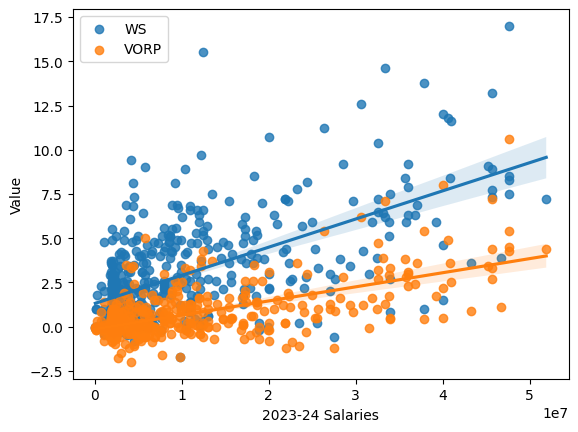

In [ ]:
sns.regplot(data=df_val_player, x='2023-24', y='WS', label='WS')
sns.regplot(data=df_val_player, x='2023-24', y='VORP', label='VORP')
plt.ylabel('Value')
plt.xlabel('2023-24 Salaries')
plt.legend(loc='best')

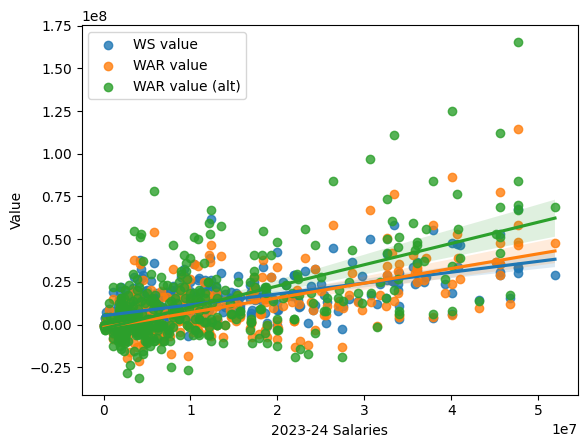

In [ ]:
sns.regplot(data=df_val_player, x='2023-24', y='WS_value', label='WS value')
sns.regplot(data=df_val_player, x='2023-24', y='WAR_value', label='WAR value')
sns.regplot(data=df_val_player, x='2023-24', y='WAR_value_alt', label='WAR value (alt)')
plt.ylabel('Value')
plt.xlabel('2023-24 Salaries')
plt.legend(loc='best')

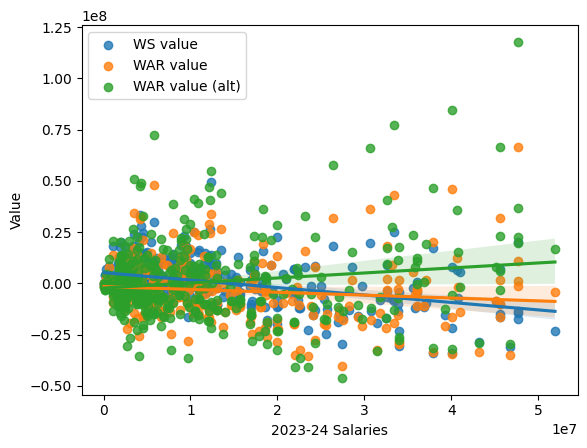

In [ ]:
sns.regplot(data=df_val_player, x='2023-24', y='WS_rel_val', label='WS value')
sns.regplot(data=df_val_player, x='2023-24', y='WAR_rel_val', label='WAR value')
sns.regplot(data=df_val_player, x='2023-24', y='WAR_alt_rel_val', label='WAR value (alt)')
plt.ylabel('Value')
plt.xlabel('2023-24 Salaries')
plt.legend(loc='best')